In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('spam.csv',encoding='latin-1')

In [24]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [26]:
data.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis = 1, inplace = True )

In [27]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
X = data['v2']

In [29]:
# lowercase the text
X = X.apply(lambda x: x.lower())

In [30]:
# apply lemmetization
import spacy
# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [31]:
# from googletrans import Translator
# translator = Translator()

In [32]:
# import time
# import tqdm
# k = []
# for i in tqdm.tqdm(X.values):
#     k.append(translator.translate(i))
#     time.sleep(1)

In [33]:
# a = []
# for val in k:
#     a.append(val.text)
# data['v2']  = a
# # data.head()

In [34]:
# X = X.apply(lambda x: ''.join([i.lemma_  for i in x]))
# X

In [35]:
# X = X.apply(lambda x : ''.join([i.text for i in k]))

In [36]:
X = X.apply(lambda x : ' '.join([i.lemma_ for i in nlp(x)]))
X

0       go until jurong point , crazy .. available onl...
1                           ok lar ... joke wif u oni ...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor ... u c already then sa...
4       nah I do not think he go to usf , he live arou...
                              ...                        
5567    this be the 2nd time we have try 2 contact u. ...
5568                 will ì _ b go to esplanade fr home ?
5569    pity , * be in mood for that . so ... any othe...
5570    the guy do some bitching but I act like I woul...
5571                          rofl . its true to its name
Name: v2, Length: 5572, dtype: object

In [37]:
X = X.apply(lambda x : x.lower())
X

0       go until jurong point , crazy .. available onl...
1                           ok lar ... joke wif u oni ...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor ... u c already then sa...
4       nah i do not think he go to usf , he live arou...
                              ...                        
5567    this be the 2nd time we have try 2 contact u. ...
5568                 will ì _ b go to esplanade fr home ?
5569    pity , * be in mood for that . so ... any othe...
5570    the guy do some bitching but i act like i woul...
5571                          rofl . its true to its name
Name: v2, Length: 5572, dtype: object

In [38]:
stopwords = nlp.Defaults.stop_words
import string
letters = string.ascii_letters

In [39]:
X = X.apply(lambda x: ' '.join([i.text for i in nlp(x)  if i.text not in stopwords and i.text not in letters ]))
X

0       jurong point , crazy .. available bugis great ...
1                             ok lar ... joke wif oni ...
2       free entry 2 wkly comp win fa cup final tkts 2...
3                                   dun early hor ... ...
4                                    nah think usf , live
                              ...                        
5567    2nd time try 2 contact u. win å£750 pound priz...
5568                              ì _ esplanade fr home ?
5569                     pity , * mood . ... suggestion ?
5570       guy bitching act like interested buy week free
5571                                          rofl . true
Name: v2, Length: 5572, dtype: object

In [40]:
K = X.apply(lambda x: ''.join([i for i in x if i not in string.punctuation and i not in string.digits]))
K

0       jurong point  crazy  available bugis great wor...
1                                   ok lar  joke wif oni 
2       free entry  wkly comp win fa cup final tkts st...
3                                         dun early hor  
4                                     nah think usf  live
                              ...                        
5567    nd time try  contact u win å£ pound prize   cl...
5568                                ì  esplanade fr home 
5569                            pity   mood   suggestion 
5570       guy bitching act like interested buy week free
5571                                           rofl  true
Name: v2, Length: 5572, dtype: object

In [41]:
K = K.apply(lambda x: ' '.join(x.split( )))
K

0       jurong point crazy available bugis great world...
1                                     ok lar joke wif oni
2       free entry wkly comp win fa cup final tkts st ...
3                                           dun early hor
4                                      nah think usf live
                              ...                        
5567    nd time try contact u win å£ pound prize claim...
5568                                  ì esplanade fr home
5569                                 pity mood suggestion
5570       guy bitching act like interested buy week free
5571                                            rofl true
Name: v2, Length: 5572, dtype: object

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
vec = TfidfVectorizer(max_features=1000)

In [44]:
tfidf = vec.fit_transform(X)
tfidf

<5572x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 28639 stored elements in Compressed Sparse Row format>

In [46]:
X = pd.DataFrame(data = d.toarray() ,columns= vec.get_feature_names_out())

NameError: name 'd' is not defined

In [66]:
y = data['v1']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2  )

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
gm = MultinomialNB()

In [71]:
gm.fit(X_train, y_train)

MultinomialNB()

In [72]:
y_pred = gm.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9757847533632287

In [92]:
from sklearn.metrics import classification_report
reports = classification_report(y_test, y_pred)
print(reports)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       0.98      0.85      0.91       160

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [93]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[952,   3],
       [ 24, 136]], dtype=int64)

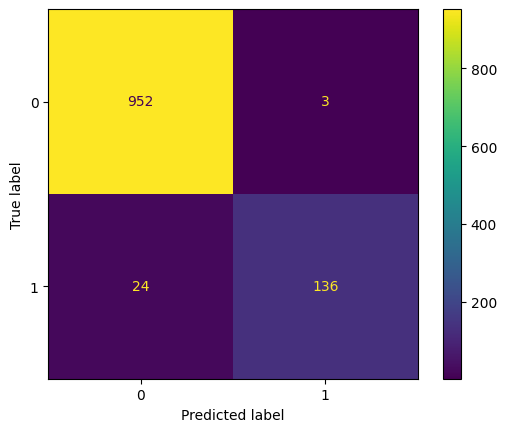

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(matrix)
display.plot()